# Weather Data Visualization  WEEK 2 PROJECT 3

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

## Load the dataset

In [2]:
file_path = 'weather_data.csv'
weather_data = pd.read_csv(file_path)

## Checking Data

In [3]:
weather_data.head()

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622


In [4]:
weather_data.describe()

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,14.779705,60.021830,5.109639,14.997598
std,14.482558,17.324022,2.947997,8.663556
min,-19.969311,30.000009,0.000009,0.000051
25%,2.269631,45.008500,2.580694,7.490101
50%,14.778002,60.018708,5.109917,14.993777
75%,27.270489,75.043818,7.613750,22.514110
max,39.999801,89.999977,14.971583,29.999973


In [5]:
missing_values=weather_data.isna().sum()
print(missing_values)

Location            0
Date_Time           0
Temperature_C       0
Humidity_pct        0
Precipitation_mm    0
Wind_Speed_kmh      0
dtype: int64


In [6]:
weather_data.columns

Index(['Location', 'Date_Time', 'Temperature_C', 'Humidity_pct',
       'Precipitation_mm', 'Wind_Speed_kmh'],
      dtype='object')

In [7]:
weather_data.shape

(1000000, 6)

## Converting Data

In [8]:
register_matplotlib_converters()
weather_data['Date_Time'] = pd.to_datetime(weather_data['Date_Time'])
weather_data.head()

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622


## Extract extra features for analysis

In [9]:
weather_data['Year'] = weather_data['Date_Time'].dt.year
weather_data['Month'] = weather_data['Date_Time'].dt.month
weather_data['Day'] = weather_data['Date_Time'].dt.day

## Heatmap

<Axes: >

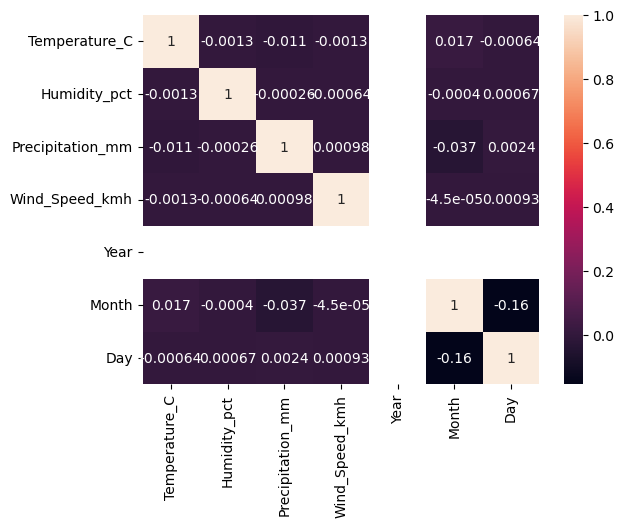

In [10]:
sns.heatmap(weather_data.corr(numeric_only=True), annot=True)

## Plot: Temperature trends over time (Line Plot)

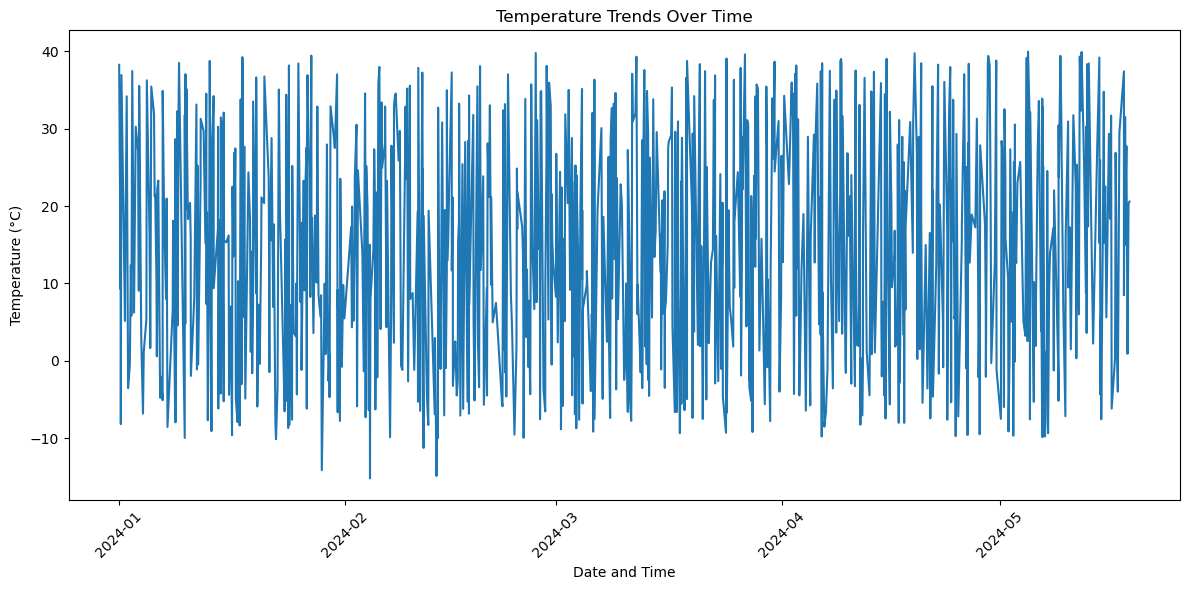

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date_Time', y='Temperature_C', data=weather_data.sample(1000),errorbar=None)
plt.title("Temperature Trends Over Time")
plt.xlabel("Date and Time")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Scatter Plot: Temperature vs. Humidity

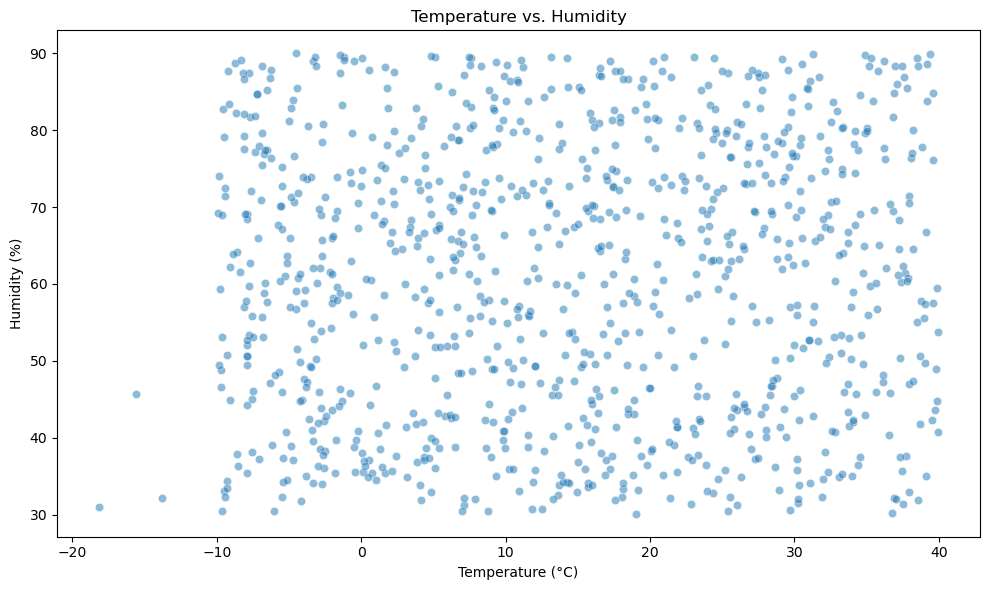

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature_C', y='Humidity_pct', data=weather_data.sample(1000), alpha=0.5)
plt.title("Temperature vs. Humidity")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.tight_layout()
plt.show()

## Bar Chart: Monthly Average Temperature

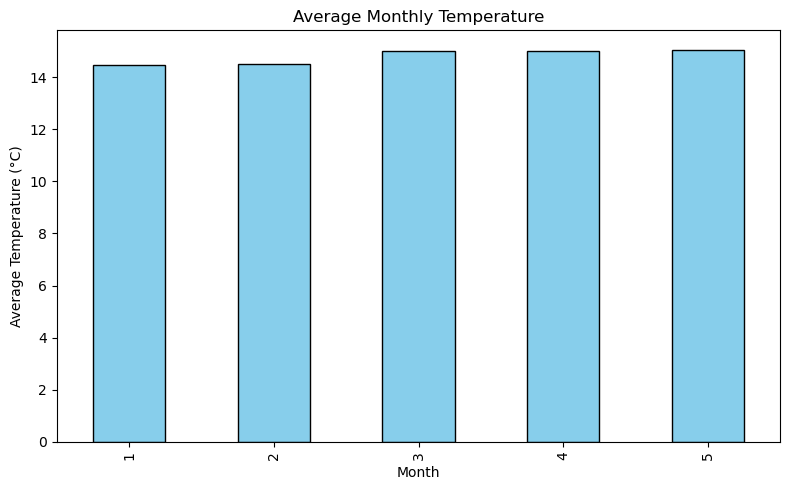

In [13]:
monthly_avg_temp = weather_data.groupby('Month')['Temperature_C'].mean()
plt.figure(figsize=(8, 5))
monthly_avg_temp.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.tight_layout()
plt.show()

## Box Plot: Identify Temperature Anomalies

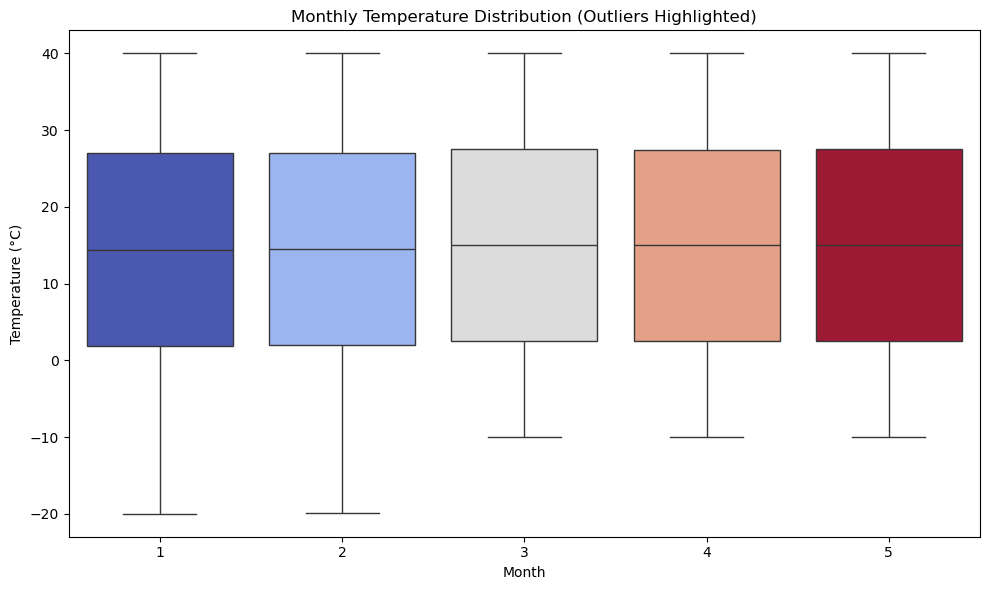

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Temperature_C', data=weather_data,hue='Month', palette='coolwarm',legend=False)
plt.title("Monthly Temperature Distribution (Outliers Highlighted)")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()